In [123]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [124]:
# import data using pandas
data = pd.read_csv("F:/Saarland_University/Summer_2020/DataScience/Assignment/2/Homework_2/housing.csv")

In [125]:
#To get the overview of the dataset
data = data.dropna()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.65660,0.0,19.58,0,0.8710,6.122,97.3,1.6180,5,403,14.7,14.10,21.5
1,0.10612,30.0,4.93,0,0.4280,6.095,65.1,6.3361,6,300,16.6,12.40,20.1
2,2.33099,0.0,19.58,0,0.8710,5.186,93.8,1.5296,5,403,14.7,28.32,17.8
3,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,3.01,46.0
4,1.15172,0.0,8.14,0,0.5380,5.701,95.0,3.7872,4,307,21.0,18.35,13.1


In [126]:
#Structure of the Data
data.shape

(506, 13)

In [127]:
#To see some statistical details
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [128]:
def data_show(data, x, y, a, b):
    data.plot(x, y, style='o')  
    plt.title(a + ' vs ' + b)  
    plt.xlabel(x)  
    plt.ylabel(y)  
    plt.show()

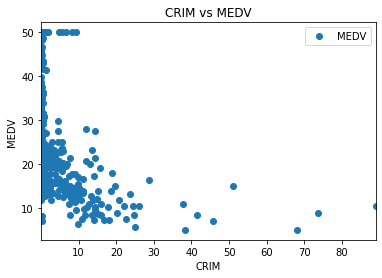

In [129]:
data_show(data, 'CRIM', 'MEDV', a= 'CRIM', b= 'MEDV')

In [130]:
# Split dataset into attribute (independent variables) and label (dependent variable)
X = data.iloc[:,0:12].values 
y = data['MEDV'].values
#X.shape
#y.shape

In [131]:
# Split dataset into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [132]:
# imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [133]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
#Define a Linear Regression model
regressor = LinearRegression()

#training the algorithm
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

22.331188118811916
[-1.27794825  1.08351106  0.45178609  0.98272902 -2.44849385  2.61831927
  0.20038205 -2.95561278  2.81952401 -2.42492555 -1.81620507 -3.87032126]


In [136]:
# Predict using the trained regression model:
y_pred = regressor.predict(X_test)

In [138]:
#Dataset of Comparing the actual and predicted values:

data_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

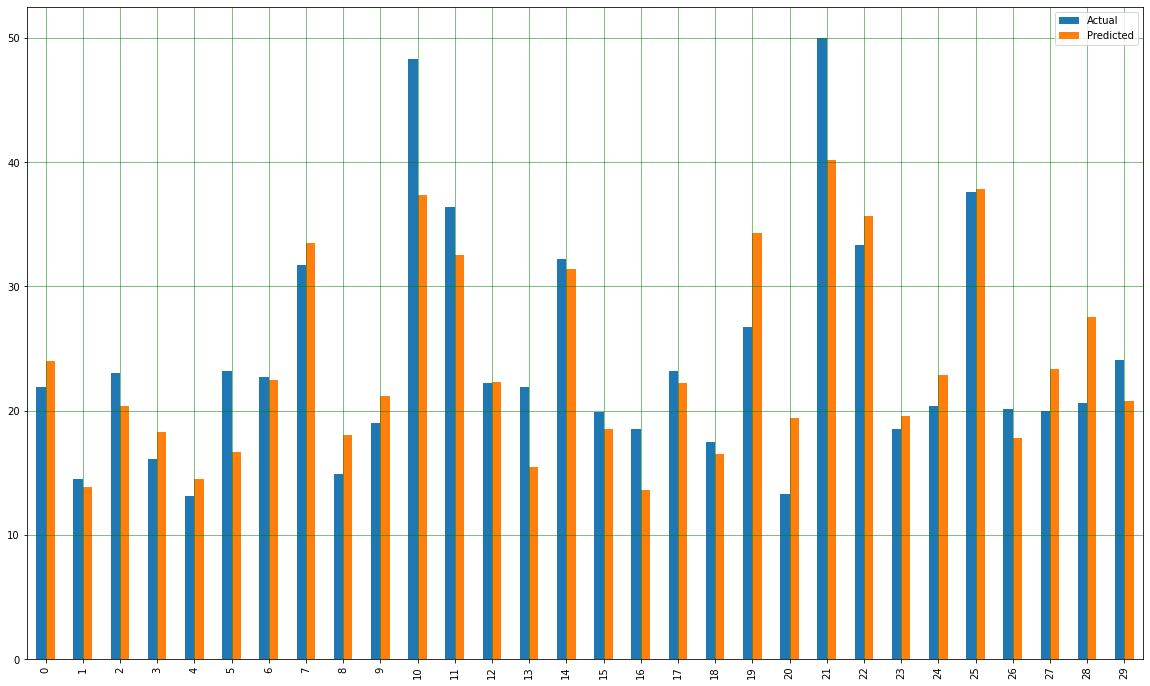

In [142]:
#Visualizing the comparison of the first 30 rows of actual and predicated data
df1 = data_compare.head(30)
df1.plot(kind='bar',figsize=(20,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [140]:
#Calculating R2 score:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.772728165693154